In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#K-Nearest Neighbor (K-En Yakın Komşu Algoritması)
data = pd.read_csv('/kaggle/input/data-cleaned-csv/data_cleaned.csv')
data.shape

(891, 25)

In [5]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [3]:
x = data.drop(['Survived'], axis = 1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [13]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("scaler", MinMaxScaler()),
    ("knn", KNeighborsClassifier())
])

In [14]:
x = pd.DataFrame(x_scaled, columns = x.columns)
x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

In [16]:
#GridSearch öncesi parametreleri tanımlama
param_grid = {
    "knn__n_neighbors" : [3,5,7,9,11], #K değeri
    "knn__weights" : ["uniform", "distance"], #tüm komşular eşit uzaklıkta (uniform),
    #yoksa uzaklığa göre ağırlıklı mı (distance)
    "knn__metric" : ["euclidean", "manhattan", "minkowski"]
}

In [17]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipeline, param_grid, cv = 5, scoring = "accuracy", n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'knn__n_neighbors': [3, 5, 7, 9, 11],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [18]:
print("En iyi parametreler:", grid_search.best_params_)

En iyi parametreler: {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}


In [19]:
#En iyi modeli test kümesinde kullanıyoruz.
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [20]:
#Performans ölçümü
from sklearn.metrics import accuracy_score, classification_report
print("Test Kümesi Başarımı: ", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Test Kümesi Başarımı:  0.8044692737430168
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       110
           1       0.77      0.71      0.74        69

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [21]:
#B Planımız -> optimal K değerini bulmak için Dirsek (Elbow) metodu
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

clf = KNN(n_neighbors = 10, metric = 'euclidean')
clf.fit(X_train, y_train)
test_predict = clf.predict(X_test)
k_1 = f1_score(test_predict, y_test)

In [22]:
def Elbow(K):

    test_error = []

    for i in K:
        clf = KNN(n_neighbors = i)
        clf.fit(X_train, y_train)
        tmp = clf.predict(X_test)
        tmp = f1_score(tmp, y_test)
        error = 1 - tmp
        test_error.append(error)

    return test_error

In [23]:
k = range(6, 20, 2)

In [24]:
test = Elbow(k)

In [26]:
import matplotlib.pyplot as plt

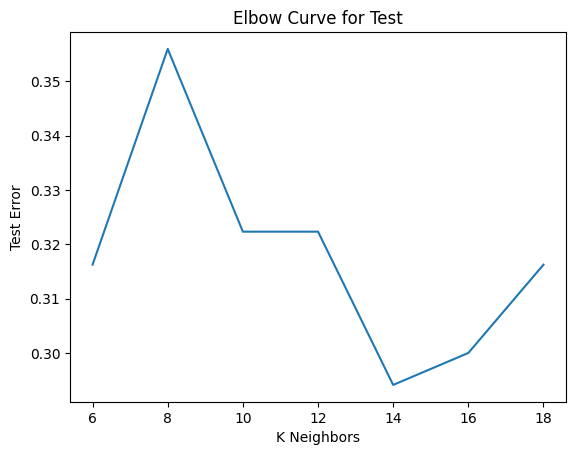

In [27]:
#Dirseği görselleştirme
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Error')
plt.title('Elbow Curve for Test')
plt.show()

In [28]:
clf = KNN(n_neighbors = 16, metric = 'euclidean')
clf.fit(X_train, y_train)
test_predict = clf.predict(X_test)
k_2 = f1_score(test_predict, y_test)

In [29]:
print("Before Elbow: ", k_1)
print("After Elbow: ", k_2)

Before Elbow:  0.6776859504132232
After Elbow:  0.7


In [30]:
#Decision Trees (Karar Ağaçları)

dataset = pd.read_csv('/kaggle/input/social-network-ads-csv/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [31]:
"""
Feature Selection (Öznitelik Seçme):
1- Variance Throshold -> Düşük varyansa sahip olan öznitelikler kaldırılır.
2- SelectKBest -> Testler yapılarak en iyi k sayıda öznitelik seçilir.
3- PCA (Temel Bileşenler Analizi - Principal Component Analysis): Verideki en fazla varyans
değerine sahip öznitelik grubunu seçer. 
4- RFE (Recursive Feature Elimination): öznitelikleri aşamalı olarak kaldırarak modelin performansına 
en çok katkı sağlayan öznitelik seçilir.
"""

'\nFeature Selection (Öznitelik Seçme):\n1- Variance Throshold -> Düşük varyansa sahip olan öznitelikler kaldırılır.\n2- SelectKBest -> Testler yapılarak en iyi k sayıda öznitelik seçilir.\n3- PCA (Temel Bileşenler Analizi - Principal Component Analysis): Verideki en fazla varyans\ndeğerine sahip öznitelik grubunu seçer. \n4- RFE (Recursive Feature Elimination): öznitelikleri aşamalı olarak kaldırarak modelin performansına \nen çok katkı sağlayan öznitelik seçilir.\n'

In [32]:
#Elle seçim
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [34]:
#Algoritmaya özniteliği seçtirme
X = dataset.drop(columns = ['User ID', 'Gender', 'Purchased'])
y = dataset['Purchased']

In [35]:
print("X içerisindeki öznitelikler:", X.columns.tolist())

X içerisindeki öznitelikler: ['Age', 'EstimatedSalary']


In [36]:
#SelectKBest ile en iyi öznitelikleri seçme
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func = f_classif, k = 2)
X_new = selector.fit_transform(X, y)

In [37]:
selected_features = X.columns[selector.get_support()]
print("Seçilen Öznitelikler:", selected_features)

Seçilen Öznitelikler: Index(['Age', 'EstimatedSalary'], dtype='object')


In [38]:
print("Yeni X matrisi:")
print(pd.DataFrame(X_new, columns = selected_features).head())

Yeni X matrisi:
   Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000
